# Forecasting

# 1.Importación librerías

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.utils import get_file

# 2.Importación fuente de datos

In [73]:
zipPath = get_file(
    origin  = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname   = 'jena_climate_2009_2016.csv.zip',
    extract = True
)
csvPath, _ = os.path.splitext(zipPath)

In [74]:
df = pd.read_csv(csvPath)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [76]:
nMuestras = int(60/10*24*30) # Número de muestras para completar un mes

In [77]:
df = df[0::nMuestras]
df.index = pd.to_datetime( df['Date Time'], format='%d.%m.%Y %H:%M:%S' )
df = df.drop(["Date Time"], axis=1)

In [78]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30
2009-01-31 00:10:00,997.40,-2.50,270.86,-4.01,89.3,5.08,4.54,0.54,2.83,4.55,1281.53,2.13,3.25,39.53
2009-03-02 00:10:00,984.11,3.60,278.03,2.07,89.7,7.91,7.09,0.81,4.50,7.21,1235.34,2.24,3.38,177.60
2009-04-01 00:10:00,994.63,3.05,276.64,-0.48,77.5,7.61,5.90,1.71,3.70,5.93,1251.62,0.35,0.63,118.50
2009-05-01 00:10:00,992.96,9.66,283.39,8.63,93.3,12.02,11.21,0.81,7.05,11.29,1217.85,0.70,1.13,138.80


# 3.Preprocesado

## 3.1Visualización de la secuencia

In [79]:
# Hacer forecast solo de la variable "T (degC)"
df = df["T (degC)"].to_frame()
df

,T (degC)
Date Time,
2009-01-01 00:10:00,-8.02
2009-01-31 00:10:00,-2.50
2009-03-02 00:10:00,3.60
2009-04-01 00:10:00,3.05
2009-05-01 00:10:00,9.66
...,...
2016-08-20 10:10:00,21.81
2016-09-19 10:10:00,11.80
2016-10-19 10:10:00,8.81


<AxesSubplot:xlabel='Date Time'>

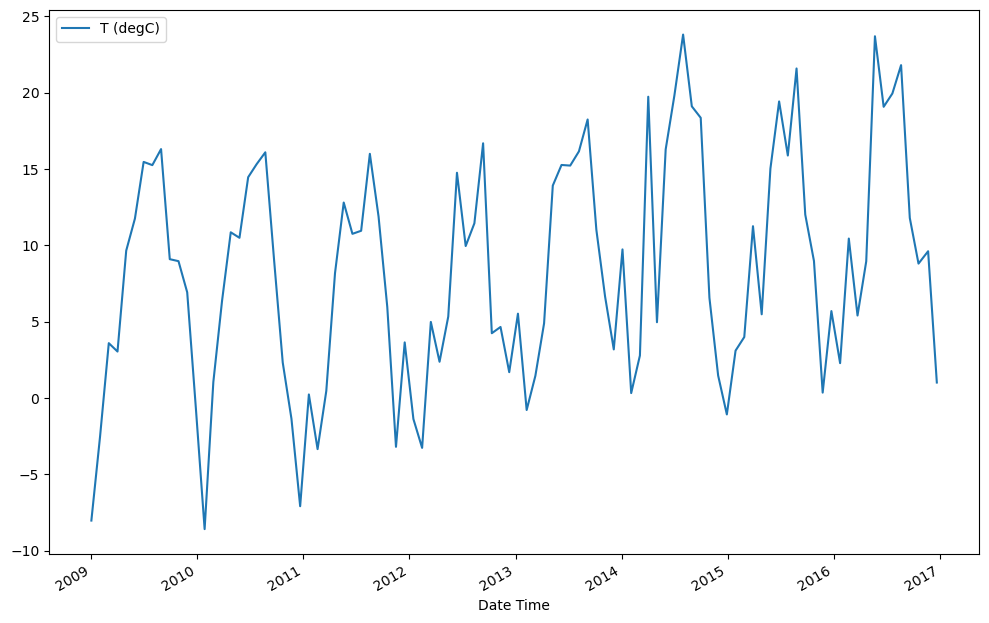

In [80]:
df.plot(figsize=(12,8))

# 4.Train Test Split

In [81]:
# 12 son los meses del año
# El resultado de la siguiente división dará la cantidad de años quq hay en el df
len(df)/12

8.166666666666666

In [82]:
# 8 años de datos
# test = 1.5 años = 18 meses
tamaño_test = 18
test_ind = len(df) - tamaño_test

In [83]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [84]:
train

,T (degC)
Date Time,
2009-01-01 00:10:00,-8.02
2009-01-31 00:10:00,-2.50
2009-03-02 00:10:00,3.60
2009-04-01 00:10:00,3.05
2009-05-01 00:10:00,9.66
...,...
2015-02-27 10:10:00,4.00
2015-03-29 10:10:00,11.26
2015-04-28 10:10:00,5.49


In [85]:
test

,T (degC)
Date Time,
2015-07-27 10:10:00,15.89
2015-08-26 10:10:00,21.59
2015-09-25 10:10:00,12.02
2015-10-25 10:10:00,8.98
2015-11-24 10:10:00,0.36
2015-12-24 10:10:00,5.70
2016-01-23 10:10:00,2.29
2016-02-22 10:10:00,10.45
2016-03-23 10:10:00,5.41


# 5.Escalado

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [87]:
# Solo usamos train para el fit() porque en caso contrario estariamos
# asumiendo información en el conjunto de test
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# 6.Creación Generador Serie Temporal

In [88]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [89]:
# Usamos los últimos 12 meses atrás para predecir eñ siguiente mes
longitud = 12
tamaño_batch = 1
generator = TimeseriesGenerator(
    data=scaled_train,
    targets=scaled_train,
    length=longitud,
    batch_size=tamaño_batch
)

In [90]:
# El generador coge 12 meses de muestra de train para predecir la siguiente
# x = 12 muestra
# y = predicción
x, y = generator[0]
print(f"Dada la muestra de 12 meses:\n\t{x.flatten()}")
print(f"Predecimos el siguiente mes:\n\t{y}")

Dada la muestra de 12 meses:
	[0.01728929 0.18771226 0.37604199 0.35906144 0.56313677 0.6279716
 0.74251312 0.73602964 0.76844705 0.54584748 0.5418339  0.4788515 ]
Predecimos el siguiente mes:
	[[0.24328496]]


# 7. Creación del modelo

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [92]:
# Definir número de variables de salida a predecir
# En caso de ser más columnas cogeríamos el número de columnas; scaled_train.shape[1]
nVariables = 1

In [93]:
# Definir modelo
model = Sequential()
# Para conseguir mayor presición aumentamos el ńumero de neuronas LSTM
model.add( LSTM(150, activation="relu", input_shape=(longitud, nVariables)) )
# Solo 1 variable de salida
model.add( Dense(nVariables) )
model.compile( optimizer="adam", loss="mse" )

In [94]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 150)               91200     
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


# 8. Entrenamiento del modelo

In [95]:
from tensorflow.keras.callbacks import EarlyStopping

In [96]:
earlyStop = EarlyStopping( monitor="var_loss", patience=4 )

In [97]:
# Definir generador para el conjunto de test que nos ayudará a validar el modelo
val_generator = TimeseriesGenerator(scaled_test, scaled_test, length=longitud, batch_size=tamaño_batch)

In [98]:
model.fit_generator(
    generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[earlyStop]
)

Epoch 1/20


/tmp/ipykernel_22768/337081219.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


68/68 [==============================] - 1s 6ms/step - loss: 0.0721 - val_loss: 0.0627
Epoch 2/20
68/68 [==============================] - 0s 4ms/step - loss: 0.0551 - val_loss: 0.0421
Epoch 3/20
68/68 [==============================] - 0s 4ms/step - loss: 0.0549 - val_loss: 0.0388
Epoch 4/20
68/68 [==============================] - 0s 4ms/step - loss: 0.0458 - val_loss: 0.0380
Epoch 5/20
68/68 [==============================] - 0s 4ms/step - loss: 0.0377 - val_loss: 0.0452
Epoch 6/20
68/68 [==============================] - 0s 4ms/step - loss: 0.0306 - val_loss: 0.0130
Epoch 7/20
68/68 [==============================] - 0s 4ms/step - loss: 0.0313 - val_loss: 0.0149
Epoch 8/20
68/68 [==============================] - 0s 4ms/step - loss: 0.0261 - val_loss: 0.0188
Epoch 9/20
68/68 [==============================] - 0s 4ms/step - loss: 0.0286 - val_loss: 0.0201
Epoch 10/20
68/68 [==============================] - 0s 4ms/step - loss: 0.0247 - val_loss: 0.0093
Epoch 11/20
68/68 [===========

In [99]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

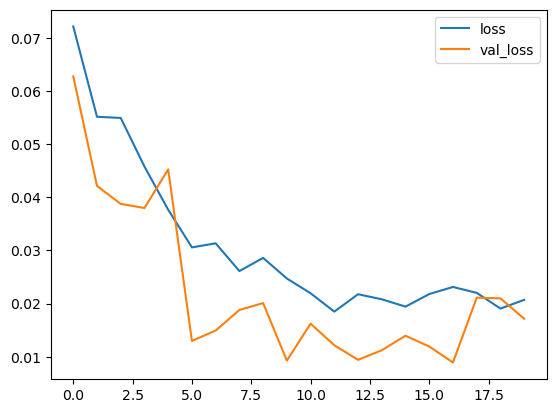

In [100]:
losses.plot()

# 9.Evaluación del modelo

In [101]:
primerBatch = scaled_train[-longitud:]
primerBatch.shape

(12, 1)

In [102]:
type(primerBatch)

numpy.ndarray

In [103]:
primerBatch = primerBatch.reshape( (1, longitud, nVariables) )
primerBatch.shape

(1, 12, 1)

In [104]:
model.predict(primerBatch)

1/1 [==============================] - 0s 107ms/step


array([[0.8298289]], dtype=float32)

In [105]:
scaled_test[0]

array([0.75548009])

In [108]:
# Bucle para predecir varios meses
test_predictions = []
primerBatch = scaled_train[-longitud:]
batchActual = primerBatch.reshape( (1, longitud, nVariables) )

for i in range(len(test)):

    # Predicción del siguiente mes. Usar [0] para coger el valor de la predicción en lugar del array
    predActual = model.predict(batchActual)[0]

    # Guardamos esta predicción
    test_predictions.append(predActual)

    # Actualizamos el batch para descartar el primer valor e incluir la nueva predicción
    batchActual = np.append( batchActual[:,1:,:], [[predActual]], axis=1 )

IndexError: index 1 is out of bounds for axis 1 with size 1